In [25]:
import pandas as pd
# ! pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the DataFrame from the CSV file
merged_df = pd.read_csv('merged_df.csv')

In [38]:
value_counts = merged_df['Russian'].value_counts()

# Get the count of entries with 1
r_count = value_counts.get(1)
w_count = value_counts.get(0)
print("Entries with 1 in the 'Russian' column:", r_count, ". ", "Entries with 1 in the 'Russian' column:", w_count)

Entries with 1 in the 'Russian' column: 22602 .  Entries with 1 in the 'Russian' column: 16727


In [27]:
# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def get_sentiment(tweet):
    return analyzer.polarity_scores(tweet)['compound']

# Apply the function to the 'tweet' column
merged_df['sentiment'] = merged_df['tweet'].apply(get_sentiment)
#print(merged_df.head())

# Compare average sentiment by source
average_sentiment_by_source = merged_df.groupby('Russian')['sentiment'].mean()
print(average_sentiment_by_source)

Russian
0   -0.124199
1   -0.036647
Name: sentiment, dtype: float64


In [29]:
# Split the DataFrame into two subsets based on the 'Russian' column
df_russian_1 = merged_df[merged_df['Russian'] == 1]
df_russian_0 = merged_df[merged_df['Russian'] == 0]
 
# Count positive, negative, and neutral sentiment western entries
positive_count_w = (df_russian_0['sentiment'] >= 0.1).sum()
negative_count_w = (df_russian_0['sentiment'] <= -0.1).sum()
neutral_count_w = w_count - negative_count_w - positive_count_w
null_count_w = (df_russian_0['sentiment'] == 0).sum()

# Count positive, negative, and neutral sentiment western entries
positive_count_r = (df_russian_1['sentiment'] >= 0.1).sum()
negative_count_r = (df_russian_1['sentiment'] <= -0.1).sum()
neutral_count_r = r_count - negative_count_r - positive_count_r
null_count_r = (df_russian_1['sentiment'] == 0).sum()

# Print the results
print("SENTIMENT ANALYSIS RESULTS FOR WESTERN TWEETS:")
print(f"Positive sentiments for Western tweets: {positive_count_w}, ({round(positive_count_w*100/w_count,2)}% of total Western tweets)")
print(f"Negative sentiments for Western tweets: {negative_count_w}, ({round(negative_count_w*100/w_count,2)}% of total Western tweets)")
print(f"Neutral sentiments for Western tweets: {neutral_count_w} ({round(neutral_count_w*100/w_count,2)}% of total Western tweets), out of which {null_count_w} have sentiment equal to 0")

# Print the results
print("SENTIMENT ANALYSIS RESULTS FOR RUSSIAN TWEETS:")
print(f"Positive sentiments for Russian tweets: {positive_count_r}, ({round(positive_count_r*100/r_count,2)}% of total Russian tweets)")
print(f"Negative sentiments for Russian tweets: {negative_count_r}, ({round(negative_count_r*100/r_count,2)}% of total Russian tweets")
print(f"Neutral sentiments for Russian tweets: {neutral_count_r} ({round(neutral_count_r*100/r_count,2)}% of total Russian tweets), out of which {null_count_r} have sentiment equal to 0")

SENTIMENT ANALYSIS RESULTS FOR WESTERN TWEETS:
Positive sentiments for Western tweets: 3468, (20.73% of total Western tweets)
Negative sentiments for Western tweets: 6650, (39.76% of total Western tweets)
Neutral sentiments for Western tweets: 6609 (39.51% of total Western tweets), out of which 6084 have sentiment equal to 0
SENTIMENT ANALYSIS RESULTS FOR RUSSIAN TWEETS:
Positive sentiments for Russian tweets: 6583, (29.13% of total Russian tweets)
Negative sentiments for Russian tweets: 7708, (34.1% of total Russian tweets
Neutral sentiments for Russian tweets: 8311 (36.77% of total Russian tweets), out of which 7676 have sentiment equal to 0


# Correlation between sentiment, likes and retweets
### (All the tweets)

                sentiment  likes_count  retweets_count
sentiment        1.000000    -0.074290       -0.096379
likes_count     -0.074290     1.000000        0.925324
retweets_count  -0.096379     0.925324        1.000000


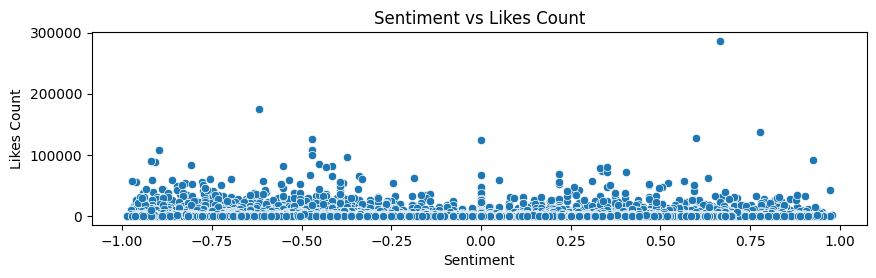

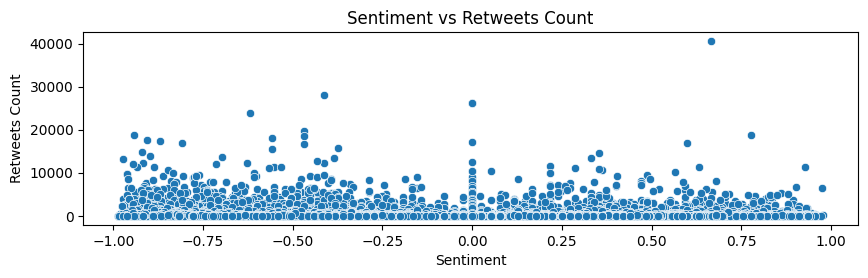

In [36]:
# Calculate the correlation matrix
correlation_matrix = merged_df[['sentiment', 'likes_count', 'retweets_count']].corr()

# Display the correlation matrix
print(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for sentiment vs. likes_count
plt.figure(figsize=(10, 2.5))
sns.scatterplot(x='sentiment', y='likes_count', data=merged_df)
plt.title('Sentiment vs Likes Count')
plt.xlabel('Sentiment')
plt.ylabel('Likes Count')
plt.show()

# Scatter plot for sentiment vs. retweets_count
plt.figure(figsize=(10, 2.5))
sns.scatterplot(x='sentiment', y='retweets_count', data=merged_df)
plt.title('Sentiment vs Retweets Count')
plt.xlabel('Sentiment')
plt.ylabel('Retweets Count')
plt.show()

# Correlation between sentiment, likes and retweets
### (Tweets divided by Western and Russian)

Correlation matrix for Russian tweets:
                sentiment  likes_count  retweets_count
sentiment        1.000000    -0.067490       -0.068646
likes_count     -0.067490     1.000000        0.932403
retweets_count  -0.068646     0.932403        1.000000

Correlation matrix for Western Tweets:
                sentiment  likes_count  retweets_count
sentiment        1.000000    -0.073812       -0.107043
likes_count     -0.073812     1.000000        0.923216
retweets_count  -0.107043     0.923216        1.000000


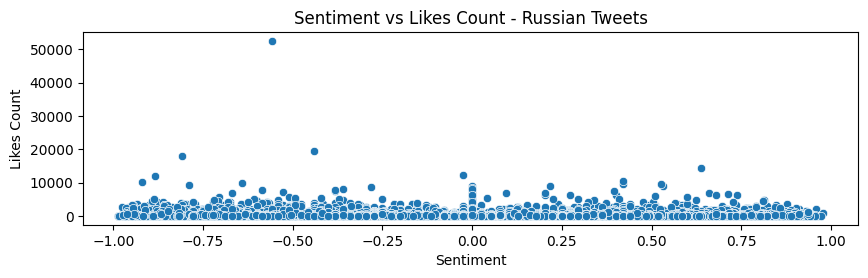

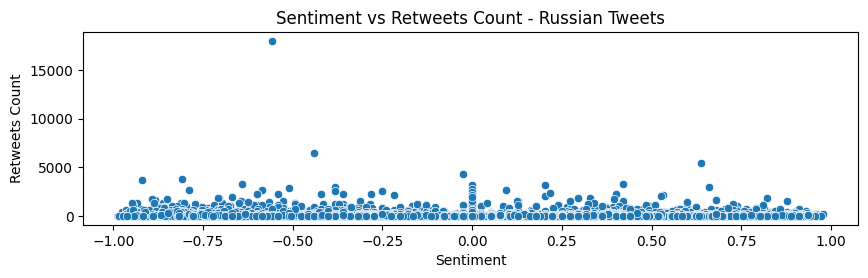

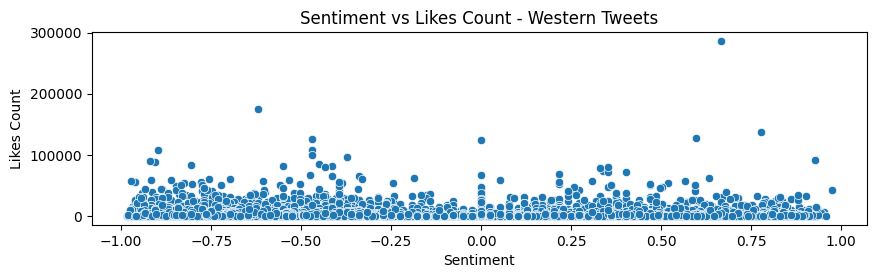

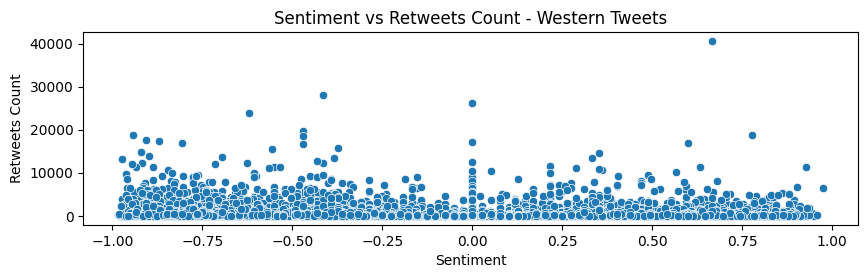

In [35]:
# Calculate the correlation for each subset
correlation_russian_1 = df_russian_1[['sentiment', 'likes_count', 'retweets_count']].corr()
correlation_russian_0 = df_russian_0[['sentiment', 'likes_count', 'retweets_count']].corr()

# Display the correlation matrices
print("Correlation matrix for Russian tweets:")
print(correlation_russian_1)

print("\nCorrelation matrix for Western Tweets:")
print(correlation_russian_0)

# Visualize the relationships using scatter plots

# Scatter plot for sentiment vs. likes_count for Russian = 1
plt.figure(figsize=(10, 2.5))
sns.scatterplot(x='sentiment', y='likes_count', data=df_russian_1)
plt.title('Sentiment vs Likes Count - Russian Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Likes Count')
plt.show()

# Scatter plot for sentiment vs. retweets_count for Russian = 1
plt.figure(figsize=(10, 2.5))
sns.scatterplot(x='sentiment', y='retweets_count', data=df_russian_1)
plt.title('Sentiment vs Retweets Count - Russian Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Retweets Count')
plt.show()

# Scatter plot for sentiment vs. likes_count for Russian = 0
plt.figure(figsize=(10, 2.5))
sns.scatterplot(x='sentiment', y='likes_count', data=df_russian_0)
plt.title('Sentiment vs Likes Count - Western Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Likes Count')
plt.show()

# Scatter plot for sentiment vs. retweets_count for Russian = 0
plt.figure(figsize=(10, 2.5))
sns.scatterplot(x='sentiment', y='retweets_count', data=df_russian_0)
plt.title('Sentiment vs Retweets Count - Western Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Retweets Count')
plt.show()

# Russian tweets:
**Sentiment vs. Likes Count:** The correlation coefficient between sentiment and likes count is -0.067490. This is a very weak negative correlation, suggesting that there is almost no relationship between the sentiment of the tweets and the number of likes they receive.

**Sentiment vs. Retweets Count:** The correlation coefficient between sentiment and retweets count is -0.068646, which is also a very weak negative correlation. This indicates that the sentiment of the tweets has almost no effect on the number of retweets.

**Likes Count vs. Retweets Count:** The correlation between likes count and retweets count is 0.932403, which is a very strong positive correlation. This implies that tweets that receive more likes tend to also receive more retweets.

# Western tweets:
**Sentiment vs. Likes Count:** The correlation coefficient between sentiment and likes count is -0.073812. Similar to the Russian tweets, this is a very weak negative correlation, indicating almost no relationship between the sentiment of the tweets and the number of likes.

**Sentiment vs. Retweets Count:** The correlation coefficient between sentiment and retweets count is -0.107043, which is still a weak negative correlation but slightly stronger than that observed in Russian tweets. This suggests a slight tendency for tweets with more negative sentiment to receive fewer retweets.

**Likes Count vs. Retweets Count:** The correlation between likes count and retweets count is 0.923216, which is a very strong positive correlation. This means that, similar to Russian tweets, Western tweets that receive more likes also tend to receive more retweets.

# Summary:
**Sentiment Correlation:** For both Russian and Western tweets, the sentiment shows very weak negative correlations with both likes and retweets. This indicates that the sentiment of the tweet (whether positive or negative) does not significantly impact its popularity in terms of likes and retweets.

**Likes and Retweets Relationship:** There is a very strong positive correlation between likes and retweets for both Russian and Western tweets. Tweets that are liked more are also retweeted more, suggesting that overall engagement metrics (likes and retweets) are closely related regardless of the sentiment or the source.

These results imply that while the sentiment of a tweet is not a strong predictor of engagement in terms of likes and retweets, the overall engagement metrics are highly interrelated. This information could be useful in understanding user interaction patterns on social media platforms.









# Evolution of average sentiment in all tweets

date
2   -0.086760
3   -0.078313
4   -0.065616
5   -0.078043
Name: sentiment, dtype: float64


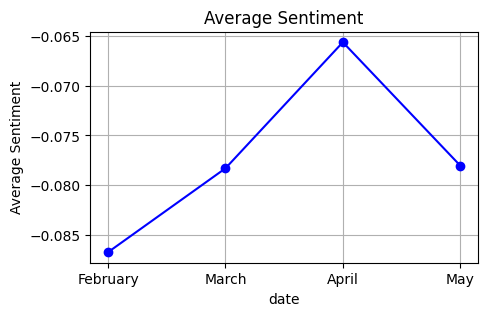

In [40]:
# Group by month and calculate the average sentiment for each month
average_sentiment_by_month = merged_df.groupby('date')['sentiment'].mean()
print(average_sentiment_by_month)

# Create a line plot to visualize the average sentiment over dates
plt.figure(figsize=(5, 3))
average_sentiment_by_month.plot(kind='line', marker='o', color='b')
plt.title('Average Sentiment')
plt.xlabel('date')
plt.ylabel('Average Sentiment')
plt.xticks(range(2, 6), ['February', 'March', 'April', 'May'])  # Assuming 2 represents February and 5 represents May
plt.grid(True)
plt.show()

Based on these sentiment values, we can observe the following evolution over time:

February (2): The sentiment value is the lowest in February, indicating a slightly more negative sentiment compared to the other months.
March (3): The sentiment value slightly improves in March compared to February, but it remains relatively negative.
April (4): There is a further improvement in sentiment in April, with the sentiment value being higher than March.
May (5): The sentiment value decreases slightly in May compared to April, but it remains relatively higher than February and March.

Overall, there is a trend of improvement in sentiment from February to April, followed by a slight decrease in May. However, it's important to note that the changes in sentiment are relatively small, indicating a somewhat stable sentiment trend over the observed period.

date
2   -0.111078
3   -0.120156
4   -0.128514
5   -0.145520
Name: sentiment, dtype: float64
date
2   -0.059909
3   -0.043283
4   -0.025640
5   -0.041001
Name: sentiment, dtype: float64


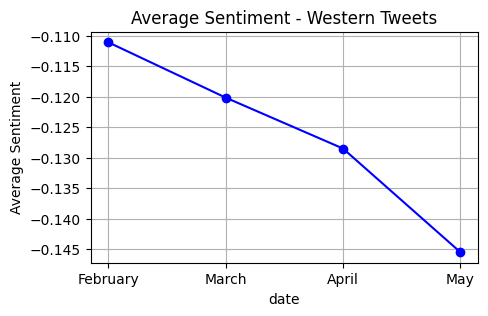

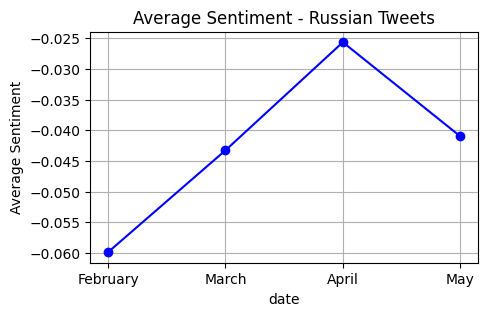

In [39]:
# Group by month and calculate the average sentiment for each month
average_sentiment_by_month_w = df_russian_0.groupby('date')['sentiment'].mean()
print(average_sentiment_by_month_w)
average_sentiment_by_month_r = df_russian_1.groupby('date')['sentiment'].mean()
print(average_sentiment_by_month_r)

# Create a line plot to visualize the average Western tweet sentiment over time
plt.figure(figsize=(5, 3))
average_sentiment_by_month_w.plot(kind='line', marker='o', color='b')
plt.title('Average Sentiment - Western Tweets')
plt.xlabel('date')
plt.ylabel('Average Sentiment')
plt.xticks(range(2, 6), ['February', 'March', 'April', 'May'])  # Assuming 2 represents February and 5 represents May
plt.grid(True)
plt.show()

# Create a line plot to visualize the average Russian tweet sentiment over time
plt.figure(figsize=(5, 3))
average_sentiment_by_month_r.plot(kind='line', marker='o', color='b')
plt.title('Average Sentiment - Russian Tweets')
plt.xlabel('date')
plt.ylabel('Average Sentiment')
plt.xticks(range(2, 6), ['February', 'March', 'April', 'May'])  # Assuming 2 represents February and 5 represents May
plt.grid(True)
plt.show()